# Machine Learning of the Cleaned Zomato Data

In [184]:
import pandas as pd
df = pd.read_csv('ZomatoIndiaCleaned.csv', encoding = 'latin-1', sep = ',')
df.head()

,Unnamed: 0,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,...,Cuisine 1_Street Food,Cuisine 1_Sushi,Cuisine 1_Tea,Cuisine 1_Tex-Mex,Cuisine 1_Thai,Cuisine 1_Tibetan,Cuisine 1_Turkish,Cuisine 1_Vietnamese,Rating text,Aggregate rating
0,0,3400025,Jahanpanah,Agra,78.011544,27.161661,850,0,0,0,...,0,0,0,0,0,0,0,0,3,3.9
1,1,3400341,Rangrezz Restaurant,Agra,0.000000,0.000000,700,0,0,0,...,0,0,0,0,0,0,0,0,3,3.5
2,2,3400005,Time2Eat - Mama Chicken,Agra,78.011608,27.160832,500,0,0,0,...,0,0,0,0,0,0,0,0,3,3.6
3,3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,77.998092,27.195928,400,0,0,0,...,0,0,0,0,0,0,0,0,4,4.0
4,4,3400017,Pinch Of Spice,Agra,78.007553,27.201725,1000,0,0,0,...,0,0,0,0,0,0,0,0,4,4.2


In [185]:
from sklearn.utils import shuffle
df = shuffle(df) #Shuffling the data
df.head()

,Unnamed: 0,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,...,Cuisine 1_Street Food,Cuisine 1_Sushi,Cuisine 1_Tea,Cuisine 1_Tex-Mex,Cuisine 1_Thai,Cuisine 1_Tibetan,Cuisine 1_Turkish,Cuisine 1_Vietnamese,Rating text,Aggregate rating
5549,7252,300459,Cake Palace,New Delhi,77.068840,28.635075,200,0,0,0,...,0,0,0,0,0,0,0,0,2,2.7
2523,3071,18456728,Druk,New Delhi,77.234094,28.550974,1000,1,0,0,...,0,0,0,0,0,0,0,0,4,4.1
343,404,9224,Kay's Bake Land,Faridabad,77.311657,28.480381,150,0,0,0,...,0,0,0,0,0,0,0,0,2,3.1
3274,3978,18349796,Chargrill Resto Bar,New Delhi,77.189206,28.649025,900,1,1,0,...,0,0,0,0,0,0,0,0,3,3.6
4682,6053,310768,High Street Cafí©,New Delhi,77.119954,28.647456,1250,1,1,0,...,0,0,0,0,0,0,0,0,3,3.8


## Let us build a Classification Model for Prediciting the rating of a restaurant.
### Target Value: Rating Text (Values: 1,2,3,4,5)

In [ ]:
Let us Visualize how each feature is correlated to the target value

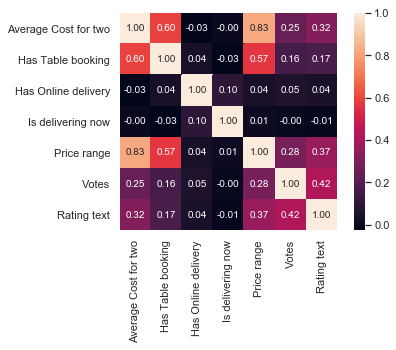

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['Average Cost for two', 'Has Table booking', 'Has Online delivery',  'Is delivering now', 'Price range', 'Votes', 'Rating text',]
cor_matrix = np.corrcoef(df[cols].values.T) # We transpose to get the data by columns. Columns become rows.
sns.set(font_scale=1)
cor_heat_map = sns.heatmap(cor_matrix,
 cbar=True,
 annot=True,
 square=True,
 fmt='.2f',
 annot_kws={'size':10},
 yticklabels=cols,
 xticklabels=cols)
plt.show()

From the above Heat map, we can see that the Target Value (Rating text) is correlated well with the 'number of votes', 'price Range' and 'average cost for two', with correlation values being 0.42, 0.37 and 0.32 respectively. 

We can also draw many other inferences like, Average cost for two and price range has a very high correlation value of 0.83 which says that Average cost for two and price range are highly dependent on each other.

In [187]:
x = df.iloc[:,6:86] #Features
y = df.iloc[:,86] #Target Value - Rating Text
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.4, random_state = 1) # Splitting the Data into Training and Test with test size as 20%

### Let us Start building Machine Learning Models and predict the accuracy score

Model 1: Decision Tree Classification

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
dtree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 1, max_depth=5, min_samples_leaf=10)
dtree_gini.fit(X_train, y_train)
dtree_gini_pred = dtree_gini.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, dtree_gini_pred)*100)
cm = confusion_matrix(y_test, dtree_gini_pred)
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=dtree_gini_pred)) #Printing the Classification report to view precision, recall and f1 scores 

Decision Tree Accuracy: 67.0759785111
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        64
          2       0.76      0.89      0.82      1442
          3       0.50      0.52      0.51       741
          4       0.54      0.25      0.34       314
          5       0.11      0.02      0.04        45

avg / total       0.63      0.67      0.64      2606



C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Model 2: Decision Tree With Ada Boost

In [189]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
    n_estimators=60,
    learning_rate=1.5, algorithm="SAMME")
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print('Decision Tree with Ada Boost Accuracy:', accuracy_score(y_test, ada_pred)*100)

Decision Tree with Ada Boost Accuracy: 63.0468150422


Model 3: Random Forest Classification

In [190]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, oob_score=True)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
print('Random Forest Accuracy:', accuracy*100)
print('Random Forest Out-of-bag score estimate:', rf.oob_score_*100)

Random Forest Accuracy: 63.7759017652
Random Forest Out-of-bag score estimate: 65.0627079601


Model 4: K Nearest Neighbor Classification

In [191]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('K Nearest Neighbor Accuracy:', accuracy_score(y_test, knn_pred)*100)

K Nearest Neighbor Accuracy: 63.4689178818


Model 5: Artificial Neural Networks (Multi Layer Perceptron)

In [192]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

nn_pred = mlp.predict(X_test)
score = accuracy_score(y_test, nn_pred)
print('Artificial Neural Network Accuracy:', score*100)

Artificial Neural Network Accuracy: 65.2724481965


# Conclusions:

1. Data Analysis Showed that Rating is dependent on Average cost of two and also number of votes
2. Correlation Matrix showed that the Average cost for two and price range are highly dependent on each other
3. Correlation Matrix also showed that Rating text is correlated well with the 'number of votes', 'price Range' and 'average cost for two'
4. Of all the 5 Models, the best accuracy that we are getting is for the decision tree classifier with the accuracy of  around 67%. This means that the Decision Tree model is predicting nearly 67% of the test data accurately
5. Future works include: Hyper Parameter Tuning and using other boosting techniques like Xgboost
6. Can improve the accuracy by converting the data into a binary classification problem and combining it